In [ ]:
 acct_type = “NGC” and acct_subtype =’DEALER” 

In [ ]:
## apend ARS data

In [323]:
import pandas as pd
import numpy as np

In [22]:
ARS= pd.read_csv('NGC_LastARS.csv')

In [324]:
De= pd.read_csv('NGC_Defaults.csv')

In [325]:
De.head()

,BusinessNumber,DefaultDate
0,10002,2018-10-03
1,10003,2014-03-10
2,10009,2011-03-15
3,10018,2010-04-05
4,10021,2011-03-17


In [5]:
len(De.BusinessNumber.unique())

16521

In [23]:
len(ARS.BusinessNumber.unique())

45527

In [6]:
ARS.head()

,BusinessNumber,LastScoreDate,LastDealerScore
0,10001,2019-01-31,10
1,10002,2017-12-31,82
2,10008,2016-10-31,25
3,10014,2019-12-31,27
4,10019,2019-01-31,24


In [326]:
client= pd.read_csv('client_master.csv')

In [8]:
client.columns

Index(['acctnum', 'accttype', 'acctsubtype', 'caid', 'custname', 'custcity',
       'custaddrline1', 'custprovincecode', 'custpostalcode', 'externalidtype',
       'externalid', 'acctaddline1', 'acctcity', 'acctprovincecd',
       'acctpostalcd'],
      dtype='object')

In [176]:
client_match.head()

,BusinessNumber,caid,DefaultDate
1,10002,CA11209956,2018-10-03
8,10042,CA11197489,2015-08-07
25,10125,CA11213957,2019-06-24
38,10175,CA11217023,2015-07-02
44,10239,CA11218710,2015-10-16


In [33]:
client.head()

,acctnum,accttype,acctsubtype,caid,custname,custcity,custaddrline1,custprovincecode,custpostalcode,externalidtype,externalid,acctaddline1,acctcity,acctprovincecd,acctpostalcd
0,DETA7000403,OVC,AUCTION,CA11741570,GARY L HAZELLIEF/PUBLIC,ANN ARBOR,3085 WHISPERWOOD DR,USA-MI,48105,OVC ID,5698281,3085 WHISPERWOOD DR,ANN ARBOR,USA-MI,48105
1,AREN7000438,OVC,AUCTION,CA11740438,ARSALAN ALI,VILLA PARK,901 W NORTH AVE,USA-IL,60181,OVC ID,5700002,901 W NORTH AVE,VILLA PARK,USA-IL,60181
2,ALOH7001395,OVC,AUCTION,CA11747260,GARY OSHIRO,HONOLULU,3720 MAHINA AVE,USA-HI,96816,OVC ID,5740421,3720 MAHINA AVE,HONOLULU,USA-HI,96816
3,80506,NGC,DEALER,CA11346933,BAVARIAN MOTORS,TOMBALL,9428 HUFSMITH RD,USA-TX,77375,NGC AA,5317162,8561 RAYSON RD STE C,HOUSTON,USA-TX,77080
4,5224772,OVC,AUCTION,CA11465278,JETT AUCTION LIMITED,PARKSVILLE,861 ALLSBROOK RD,CAN-BC,V9P 2A9,OVC ID,399669,861 ALLSBROOK RD,PARKSVILLE,CAN-BC,V9P 2A9


In [12]:
client.accttype.unique()

array(['OVC', 'NGC', 'SVOC'], dtype=object)

In [34]:
client.acctsubtype.unique()

array(['AUCTION', 'DEALER', 'PRIMARY'], dtype=object)

In [24]:
client_match2 = client[client['accttype']=='NGC']
client_match2 = client_match2[client_match2['acctsubtype']=='DEALER']

In [25]:
min(ARS.BusinessNumber.unique())

10001

In [26]:
client_match2.acctnum.unique()

array(['80506', '102439', '81062', ..., '114620', '119289', '105763'],
      dtype=object)

In [27]:
ARS['BusinessNumber'] = ARS['BusinessNumber'].astype(str)

In [8]:
De['BusinessNumber'] = De['BusinessNumber'].astype(str)

In [28]:
client_match2 = pd.merge(ARS, client_match2, left_on='BusinessNumber', right_on='acctnum',how='left')

In [30]:
client_match2.shape

(83847, 18)

In [31]:
client_match2=client_match2.drop_duplicates(['BusinessNumber','LastScoreDate'],keep= 'last')

In [32]:
client_match2.isnull().sum()

BusinessNumber         0
LastScoreDate          0
LastDealerScore        0
acctnum             7129
accttype            7129
acctsubtype         7129
caid                7129
custname            7129
custcity            7129
custaddrline1       7131
custprovincecode    7129
custpostalcode      7129
externalidtype      7129
externalid          7129
acctaddline1        7133
acctcity            7129
acctprovincecd      7129
acctpostalcd        7129
dtype: int64

In [33]:
client_match2.shape

(45527, 18)

In [34]:
client_match2.columns

Index(['BusinessNumber', 'LastScoreDate', 'LastDealerScore', 'acctnum',
       'accttype', 'acctsubtype', 'caid', 'custname', 'custcity',
       'custaddrline1', 'custprovincecode', 'custpostalcode', 'externalidtype',
       'externalid', 'acctaddline1', 'acctcity', 'acctprovincecd',
       'acctpostalcd'],
      dtype='object')

In [35]:
client_match2=client_match2.loc[:,['LastDealerScore','caid']]

In [36]:
client_match2=client_match2.dropna()

In [15]:
dealer= pd.read_csv('dealer_data.csv')

In [50]:
dealer.columns

Index(['isca', 'caid', 'Vin', 'MMR_adj_current', 'RMI_adj_current', 'AvgPrice',
       'avgmiles', 'Salesefficiency', 'AvgDaysToSell', 'inventory',
       'NGC_floored_amount', 'list_price', 'wholesale_price', 'MMR_price',
       'revenue', 'cost', 'profitability', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'price_gap',
       'car_count'],
      dtype='object')

In [37]:
dealer_ars = pd.merge(client_match2, dealer, left_on='caid', right_on='caid',how='right')

In [38]:
dealer_ars.shape

(110227, 34)

In [39]:
dealer_ars.isnull().sum()

LastDealerScore               95470
caid                              0
isca                              0
Vin                               0
MMR_adj_current                2313
RMI_adj_current                4042
AvgPrice                       1173
avgmiles                       1173
Salesefficiency                1173
AvgDaysToSell                  1173
inventory                      1296
NGC_floored_amount           101113
list_price                    55048
wholesale_price               51673
MMR_price                      3955
revenue                           0
cost                              0
profitability                  3955
Velocity_Cold                     0
Velocity_Hot                      0
Velocity_Warm                     0
vol_tier_Tier1                    0
vol_tier_Tier2                    0
vol_tier_Tier3                    0
vol_tier_Tier4                    0
vol_tier_Tier5                    0
availability_Excessive            0
availability_High           

In [40]:
df=dealer_ars.dropna(subset=['LastDealerScore'], how='all')

In [41]:
df.shape

(14757, 34)

In [43]:
id=list(df.caid)

In [44]:
to_predict=dealer_ars[~dealer_ars['caid'].isin(id)]

In [45]:
to_predict.shape

(95470, 34)

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [47]:
df.columns

Index(['LastDealerScore', 'caid', 'isca', 'Vin', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'NGC_floored_amount', 'list_price',
       'wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'price_gap', 'car_count'],
      dtype='object')

In [62]:
df.isnull().sum()

isca                         0
MMR_adj_current              0
RMI_adj_current              0
AvgPrice                     0
avgmiles                     0
Salesefficiency              0
AvgDaysToSell                0
inventory                    0
MMR_price                    0
revenue                      0
cost                         0
profitability                0
Velocity_Cold                0
Velocity_Hot                 0
Velocity_Warm                0
vol_tier_Tier1               0
vol_tier_Tier2               0
vol_tier_Tier3               0
vol_tier_Tier4               0
vol_tier_Tier5               0
availability_Excessive       0
availability_High            0
availability_Low             0
availability_Medium          0
availability_No Inventory    0
availability_Other           0
car_count                    0
LastDealerScore              0
dtype: int64

In [59]:
df=df.loc[:,['isca', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count','LastDealerScore']]

In [60]:
df=df.dropna()

In [61]:
df.shape

(14269, 28)

In [63]:
X=df.loc[:,['isca', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count']]

In [64]:
X.shape

(14269, 27)

In [65]:
X.isnull().sum()

isca                         0
MMR_adj_current              0
RMI_adj_current              0
AvgPrice                     0
avgmiles                     0
Salesefficiency              0
AvgDaysToSell                0
inventory                    0
MMR_price                    0
revenue                      0
cost                         0
profitability                0
Velocity_Cold                0
Velocity_Hot                 0
Velocity_Warm                0
vol_tier_Tier1               0
vol_tier_Tier2               0
vol_tier_Tier3               0
vol_tier_Tier4               0
vol_tier_Tier5               0
availability_Excessive       0
availability_High            0
availability_Low             0
availability_Medium          0
availability_No Inventory    0
availability_Other           0
car_count                    0
dtype: int64

In [66]:
y=df.loc[:,'LastDealerScore']

In [83]:
min(df.LastDealerScore)

1.0

In [84]:
max(df.LastDealerScore)

100.0

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [68]:
print(X_train.shape)
print(X_test.shape)

(9988, 27)
(4281, 27)


# LR

In [71]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

24.388876252305124
[ 7.76079325e-10 -2.72427998e-05  9.76094474e-05  2.98005525e-04
  2.67432197e-05  2.80695630e+00 -6.51536578e-03 -1.02949200e-03
 -3.59647268e-04 -7.15164833e-07  1.08001486e-06  3.08087782e-01
  3.53466732e-02  2.45098340e-02  2.42061421e-02 -1.35267481e+01
 -1.35379380e+01 -1.35078363e+01 -1.35357310e+01 -1.34972157e+01
  1.34816811e+01  1.34846526e+01  1.34833660e+01  1.34983595e+01
  1.30334683e+01  1.34521522e+01  5.06247680e-03]


In [73]:
y_pred = regressor.predict(X_test)

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.513393519487984
Mean Squared Error: 457.8071223881244
Root Mean Squared Error: 21.396427795034487


# Knn Rrgression 

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = pd.DataFrame(scaler.transform(X_train))
X_test_std = pd.DataFrame(scaler.transform(X_test))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [88]:
X_train_std.columns = ['isca', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count']
X_test_std.columns = ['isca', 'MMR_adj_current',
       'RMI_adj_current', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count']

In [89]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
np.random.seed(42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state = 42) 
outer_cv = KFold(n_splits=5, shuffle=True, random_state = 42)

In [95]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,15,25, 50],
                              'weights': ['uniform','distance']}],
                  scoring='neg_mean_squared_error',
                  cv=inner_cv)
gs_knn = gs_knn.fit(X_train_std,y_train) 
print("\n Parameter Tuning for knn")
print("Non-nested CV f1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_train_std, y=y_train, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning for knn
Non-nested CV f1:  -450.9645947937525
Optimal Parameter:  {'n_neighbors': 50, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=50, p=2,
          weights='uniform')
Nested CV f1:  -450.96588709719236  +/-  13.376304032184992


In [96]:
################################# kNN Evaluation #########################################
y_pred =  gs_knn.best_estimator_.predict(X_test_std)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.55284279373978
Mean Squared Error: 459.62241009110016
Root Mean Squared Error: 21.43880617224523


# Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor

gs_rf = GridSearchCV(estimator= RandomForestRegressor(random_state=42),
                  param_grid=[{'n_estimators':[50, 100, 200],
                               'max_depth': [1,3,5, 10, 20],
                               'min_impurity_decrease': [0.1, 0.01, 0.001],
                               'max_features': ['sqrt', 'log2', None]
                              }],
                  scoring='neg_mean_squared_error',
                  cv=inner_cv)

gs_rf = gs_rf.fit(X_train,y_train)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV f1: ", gs_rf.best_score_)
print("Optimal Parameter: ", gs_rf.best_params_)    
print("Optimal Estimator: ", gs_rf.best_estimator_) 

 Parameter Tuning for Decision Tree
Non-nested CV f1:  -443.421340561796
Optimal Parameter:  {'max_depth': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'n_estimators': 200}
Optimal Estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.1, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [98]:
y_pred =  gs_rf.best_estimator_.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.428812098798847
Mean Squared Error: 454.24278227431915
Root Mean Squared Error: 21.312972159563273


In [139]:
#### feature importance

In [236]:
gs_rf.best_estimator_.feature_importances_

array([0.        , 0.06391684, 0.05041801, 0.05052179, 0.05835447,
       0.04897722, 0.05282367, 0.05281994, 0.0649067 , 0.0532572 ,
       0.0495464 , 0.09224359, 0.01716466, 0.03314423, 0.02461994,
       0.01694418, 0.02355108, 0.02650731, 0.02987529, 0.02582408,
       0.01541387, 0.02209547, 0.0210347 , 0.05347031, 0.00336166,
       0.01135094, 0.03785643])

Feature ranking:
1. feature 11 (0.092244)
2. feature 8 (0.064907)
3. feature 1 (0.063917)
4. feature 4 (0.058354)
5. feature 23 (0.053470)
6. feature 9 (0.053257)
7. feature 6 (0.052824)
8. feature 7 (0.052820)
9. feature 3 (0.050522)
10. feature 2 (0.050418)
11. feature 10 (0.049546)
12. feature 5 (0.048977)
13. feature 26 (0.037856)
14. feature 13 (0.033144)
15. feature 18 (0.029875)
16. feature 17 (0.026507)
17. feature 19 (0.025824)
18. feature 14 (0.024620)
19. feature 16 (0.023551)
20. feature 21 (0.022095)
21. feature 22 (0.021035)
22. feature 12 (0.017165)
23. feature 15 (0.016944)
24. feature 20 (0.015414)
25. feature 25 (0.011351)
26. feature 24 (0.003362)
27. feature 0 (0.000000)


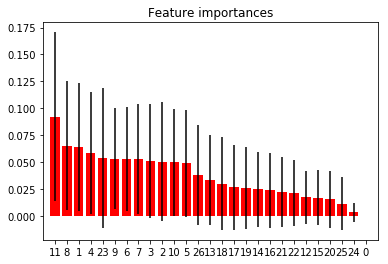

In [237]:
importances = gs_rf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in gs_rf.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Lasso

In [133]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=4)
clf.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
print(clf.coef_)

[ 0.00000000e+00 -3.35334102e-06  1.03769621e-04  2.89604047e-04
  2.86400478e-05  0.00000000e+00 -0.00000000e+00 -8.72923048e-04
 -3.93121970e-04  9.53359750e-08  8.02907019e-08  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.47365933e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.38813229e-03 -0.00000000e+00  2.49698637e-03
 -0.00000000e+00 -8.99132737e-03 -4.79166438e-04]


In [135]:
y_pred = clf.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.50476569482153
Mean Squared Error: 457.21253117083063
Root Mean Squared Error: 21.38252864304946


# Default

## Data Preparation

In [136]:
NGC= pd.read_csv('NGC_CurrentLOC.csv')

In [137]:
NGC.head()

,business_number,Credit Type,LOC_Create_Date_Time,Credit_Limit
0,10014,Retail,2013-01-15,100000.0
1,10024,Retail,2013-01-18,200000.0
2,10044,Retail,2011-11-25,50000.0
3,10045,Retail,2016-09-28,730000.0
4,10045,Wholesale,2016-09-28,2170000.0


In [141]:
NGC.shape

(24583, 4)

In [140]:
len(NGC.business_number.unique())

22702

In [142]:
NGC_t= pd.read_csv('NGC_CurrentTempLOC.csv')

In [146]:
NGC_t.shape

(1849, 5)

In [144]:
NGC_t.head()

,business_number,Credit Type,LOC_Create_Date,LOC_Terminate_Date,Temp_Credit_Limit
0,10080,Retail,2020-01-07,2020-03-07,1.0
1,11881,Retail,2020-01-10,2020-03-10,1.0
2,12611,Retail,2019-09-11,2020-09-11,1.0
3,12847,Retail,2019-08-12,2020-08-12,1.0
4,13014,Retail,2020-01-07,2020-03-07,1.0


In [145]:
len(NGC_t.business_number.unique())

1787

In [149]:
result = NGC.append(NGC_t)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [151]:
result.shape

(26432, 7)

In [152]:
len(result.business_number.unique())

22702

In [155]:
De['BusinessNumber'] = De['BusinessNumber'].astype(str)
NGC['business_number'] = NGC['business_number'].astype(str)

In [188]:
DE_all = pd.merge(De, NGC, left_on='BusinessNumber', right_on='business_number',how='left')

In [189]:
DE_all.shape
## only 16584 dealers can be matched with NGC

(16584, 6)

In [192]:
DE_all = pd.merge(De, NGC, left_on='BusinessNumber', right_on='business_number',how='right')

In [193]:
DE_all.head()

,BusinessNumber,DefaultDate,business_number,Credit Type,LOC_Create_Date_Time,Credit_Limit
0,12273,2019-11-04,12273,Retail,2005-09-28,40000.0
1,13433,2018-02-16,13433,Retail,2013-05-08,200000.0
2,16103,2019-11-01,16103,Retail,2005-12-29,400000.0
3,19327,2019-08-08,19327,Retail,2010-09-29,200000.0
4,22667,2019-10-11,22667,Retail,2013-02-28,60000.0


In [194]:
DE_all.shape

(24583, 6)

In [195]:
DE_all.isnull().sum()

BusinessNumber          23602
DefaultDate             23602
business_number             0
Credit Type                 0
LOC_Create_Date_Time        0
Credit_Limit                0
dtype: int64

In [196]:
DE_all.loc[(pd.isnull(DE_all.BusinessNumber)), 'Default'] = 0

In [197]:
DE_all.loc[(pd.isnull(DE_all.Default)), 'Default'] = 1

In [198]:
DE_all.head()

,BusinessNumber,DefaultDate,business_number,Credit Type,LOC_Create_Date_Time,Credit_Limit,Default
0,12273,2019-11-04,12273,Retail,2005-09-28,40000.0,1.0
1,13433,2018-02-16,13433,Retail,2013-05-08,200000.0,1.0
2,16103,2019-11-01,16103,Retail,2005-12-29,400000.0,1.0
3,19327,2019-08-08,19327,Retail,2010-09-29,200000.0,1.0
4,22667,2019-10-11,22667,Retail,2013-02-28,60000.0,1.0


In [199]:
DE_all.Default.value_counts()

0.0    23602
1.0      981
Name: Default, dtype: int64

In [203]:
DE_all.shape

(24583, 7)

In [216]:
len(DE_all.business_number.unique())

22702

In [ ]:
data=data.drop_duplicates(['business_number','Default'],keep= 'last')

In [204]:
client_match = client[client['accttype']=='NGC']
client_match = client_match[client_match['acctsubtype']=='DEALER']

In [209]:
data = pd.merge(DE_all, client_match, left_on='business_number', right_on='acctnum',how='left')

In [214]:
data=data.drop_duplicates(['business_number','Default'],keep= 'last')

In [215]:
data.shape

(22702, 22)

In [217]:
data.isnull().sum()

BusinessNumber          21784
DefaultDate             21784
business_number             0
Credit Type                 0
LOC_Create_Date_Time        0
Credit_Limit                0
Default                     0
acctnum                  6949
accttype                 6949
acctsubtype              6949
caid                     6949
custname                 6949
custcity                 6949
custaddrline1            6950
custprovincecode         6949
custpostalcode           6949
externalidtype           6949
externalid               6949
acctaddline1             6952
acctcity                 6949
acctprovincecd           6949
acctpostalcd             6949
dtype: int64

In [218]:
data=data.dropna(subset=['caid'], how='all')

In [220]:
data=data.loc[:,['caid','Default']]

In [221]:
data.shape

(15753, 2)

In [223]:
Default = pd.merge(data, dealer, left_on='caid', right_on='caid',how='left')

In [225]:
dealer.isnull().sum()

isca                              0
caid                              0
Vin                               0
MMR_adj_current                2305
RMI_adj_current                4029
AvgPrice                       1167
avgmiles                       1167
Salesefficiency                1167
AvgDaysToSell                  1167
inventory                      1290
NGC_floored_amount           100982
list_price                    54795
wholesale_price               51634
MMR_price                      3942
revenue                           0
cost                              0
profitability                  3942
Velocity_Cold                     0
Velocity_Hot                      0
Velocity_Warm                     0
vol_tier_Tier1                    0
vol_tier_Tier2                    0
vol_tier_Tier3                    0
vol_tier_Tier4                    0
vol_tier_Tier5                    0
availability_Excessive            0
availability_High                 0
availability_Low            

In [227]:
Default.isnull().sum()

caid                             0
Default                          0
isca                             0
Vin                           5680
MMR_adj_current               5811
RMI_adj_current               5958
AvgPrice                      5769
avgmiles                      5769
Salesefficiency               5769
AvgDaysToSell                 5769
inventory                     5777
NGC_floored_amount            6991
list_price                   13303
wholesale_price               6257
MMR_price                     5958
revenue                       5680
cost                          5680
profitability                 5958
Velocity_Cold                 5680
Velocity_Hot                  5680
Velocity_Warm                 5680
vol_tier_Tier1                5680
vol_tier_Tier2                5680
vol_tier_Tier3                5680
vol_tier_Tier4                5680
vol_tier_Tier5                5680
availability_Excessive        5680
availability_High             5680
availability_Low    

In [226]:
Default.loc[(pd.isnull(Default.isca)), 'isca'] = 1

In [228]:
Default.columns

Index(['caid', 'Default', 'isca', 'Vin', 'MMR_adj_current', 'RMI_adj_current',
       'AvgPrice', 'avgmiles', 'Salesefficiency', 'AvgDaysToSell', 'inventory',
       'NGC_floored_amount', 'list_price', 'wholesale_price', 'MMR_price',
       'revenue', 'cost', 'profitability', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'price_gap',
       'car_count'],
      dtype='object')

In [229]:
df2=Default.loc[:,['Default', 'isca', 'MMR_adj_current', 'RMI_adj_current',
       'AvgPrice', 'avgmiles', 'Salesefficiency', 'AvgDaysToSell', 'inventory',
       'NGC_floored_amount', 'wholesale_price', 'MMR_price',
       'revenue', 'cost', 'profitability', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other',
       'car_count']]

In [230]:
df2=df2.dropna()

In [231]:
df2.shape

(8158, 30)

In [ ]:
df2["Default"] = df2["Default"].astype('category')

In [244]:
data=df2

In [245]:
data.shape

(8158, 30)

In [246]:
data.head()

,Default,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,...,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,car_count
2,1.0,1.0,4412.878788,7131.521739,5011.363636,132692.303030,0.555094,14.939394,71.939394,5379.090909,...,18.0,7.0,2.0,1.0,4.0,3.0,25.0,0.0,0.0,34.0
4,1.0,1.0,3348.275862,6480.681818,4371.833333,131640.966667,0.589698,22.033333,107.700000,2726.666667,...,13.0,3.0,5.0,0.0,3.0,1.0,26.0,0.0,0.0,30.0
5,1.0,1.0,9820.454545,12877.272727,9962.454545,86341.454545,0.609036,15.090909,126.636364,9936.000000,...,4.0,2.0,1.0,0.0,2.0,3.0,6.0,0.0,0.0,11.0
11,1.0,1.0,2767.857143,5237.500000,4146.428571,130229.000000,0.599534,14.142857,89.714286,3210.000000,...,2.0,1.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,7.0
16,1.0,1.0,5806.447368,9352.884615,6011.180905,105955.919598,0.601841,30.613065,169.862944,4067.620833,...,48.0,39.0,43.0,1.0,38.0,52.0,106.0,2.0,0.0,200.0


# Model Building

## UP Sampling

In [302]:
# train-test split
from sklearn.model_selection import train_test_split
X = data.iloc[:,range(1,30)]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [303]:
X.head()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,wholesale_price,...,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,car_count
2,1.0,4412.878788,7131.521739,5011.363636,132692.303030,0.555094,14.939394,71.939394,5379.090909,3425.000000,...,18.0,7.0,2.0,1.0,4.0,3.0,25.0,0.0,0.0,34.0
4,1.0,3348.275862,6480.681818,4371.833333,131640.966667,0.589698,22.033333,107.700000,2726.666667,2363.333333,...,13.0,3.0,5.0,0.0,3.0,1.0,26.0,0.0,0.0,30.0
5,1.0,9820.454545,12877.272727,9962.454545,86341.454545,0.609036,15.090909,126.636364,9936.000000,9513.636364,...,4.0,2.0,1.0,0.0,2.0,3.0,6.0,0.0,0.0,11.0
11,1.0,2767.857143,5237.500000,4146.428571,130229.000000,0.599534,14.142857,89.714286,3210.000000,2942.857143,...,2.0,1.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,7.0
16,1.0,5806.447368,9352.884615,6011.180905,105955.919598,0.601841,30.613065,169.862944,4067.620833,3732.500000,...,48.0,39.0,43.0,1.0,38.0,52.0,106.0,2.0,0.0,200.0


In [304]:
y_train.value_counts()

0.0    5603
1.0     107
Name: Default, dtype: int64

In [305]:
y_test.value_counts()

0.0    2395
1.0      53
Name: Default, dtype: int64

In [306]:
# since the dataset is not too huge, we don't want to lose any information by downsampling
# only consider the training set, since we want to leave the test set completely unseen
from sklearn.utils import resample

data_train_concat = pd.concat([X_train, y_train], axis = 1)

# Separate majority and minority classes
data_train_concat_majority = data_train_concat[data_train_concat.Default == 0]
data_train_concat_minority = data_train_concat[data_train_concat.Default == 1]
 
# Upsample minority class
data_train_concat_minority_upsampled = resample(data_train_concat_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5603,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
data_train_concat_upsampled = pd.concat([data_train_concat_majority, data_train_concat_minority_upsampled])
 
# Display new class counts
data_train_concat_upsampled.Default.value_counts()

1.0    5603
0.0    5603
Name: Default, dtype: int64

In [307]:
data_train_concat_upsampled.columns

Index(['isca', 'MMR_adj_current', 'RMI_adj_current', 'AvgPrice', 'avgmiles',
       'Salesefficiency', 'AvgDaysToSell', 'inventory', 'NGC_floored_amount',
       'wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability',
       'Velocity_Cold', 'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1',
       'vol_tier_Tier2', 'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'car_count', 'Default'],
      dtype='object')

In [308]:
data_train_concat_upsampled.shape

(11206, 30)

In [309]:
X_train_final = data_train_concat_upsampled.iloc[:, range(0, 29)].reset_index(drop = True)
y_train_final = data_train_concat_upsampled.iloc[:,29].reset_index(drop = True)

In [310]:
X_test.head()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,wholesale_price,...,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,car_count
0,1.0,4350.000000,7325.000000,4259.000000,153427.000000,0.594352,10.000000,21.000000,5485.000000,5200.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,27600.000000,38400.000000,26755.500000,64035.500000,0.414106,23.000000,154.500000,35175.000000,30500.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,1.0,6704.329609,9958.079268,6758.300000,114919.713514,0.593804,16.591892,97.989130,13485.000000,7861.403509,...,100.0,82.0,73.0,1.0,31.0,88.0,248.0,2.0,0.0,373.0
3,1.0,7952.500000,11175.000000,11035.000000,111312.900000,0.572214,15.600000,90.400000,8180.000000,7745.454545,...,6.0,1.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,11.0
4,1.0,4012.500000,7172.058824,3750.846154,113312.961538,0.635392,17.730769,86.307692,4620.454545,3251.923077,...,7.0,6.0,6.0,0.0,0.0,6.0,20.0,0.0,0.0,26.0


In [311]:
X_train_final.head()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,wholesale_price,...,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,car_count
0,1.0,4520.652174,7426.136364,6325.913043,119449.521739,0.625729,15.130435,112.869565,4092.142857,3939.130435,...,10.0,2.0,0.0,0.0,0.0,2.0,21.0,0.0,0.0,23.0
1,1.0,6938.114508,10109.402516,7307.992832,97898.939068,0.646578,23.301075,234.046763,10919.417476,10604.545455,...,65.0,33.0,19.0,0.0,25.0,63.0,190.0,1.0,0.0,280.0
2,1.0,4331.250000,8675.000000,6552.375000,127926.000000,0.592375,14.375000,164.375000,5614.375000,5312.500000,...,3.0,0.0,1.0,0.0,0.0,1.0,7.0,0.0,0.0,8.0
3,1.0,12383.653846,15409.615385,14353.384615,50335.884615,0.620875,21.846154,580.115385,13711.538462,13375.000000,...,3.0,0.0,2.0,0.0,7.0,5.0,13.0,0.0,1.0,26.0
4,1.0,2122.727273,4228.947368,3258.863636,129188.681818,0.614575,14.909091,86.409091,2062.500000,1850.000000,...,7.0,7.0,1.0,0.0,1.0,1.0,20.0,0.0,0.0,22.0


## DT 

In [327]:
from sklearn.tree import DecisionTreeClassifier 

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [2,5,8,10,15],
                              'max_leaf_nodes': range(10,100,10),
                              'min_impurity_decrease': [0.1, 0.01, 0.001]}],
                  scoring='f1',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X_train_final,y_train_final)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV f1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_dt = cross_val_score(gs_dt, X=X_train_final, y=y_train_final, cv=outer_cv) # the score is an array, score of the model in each outer fold
                                                             # for the best parameters
print("Nested CV f1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 Parameter Tuning for Decision Tree
Non-nested CV f1:  0.9566969382878816
Optimal Parameter:  {'max_depth': 15, 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.001}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=90,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Nested CV f1:  0.9566964363322417  +/-  0.004274254309474767


In [328]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred =  gs_dt.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Non-Default','Default']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

 Non-Default       0.98      0.91      0.95      2395
     Default       0.03      0.13      0.05        53

   micro avg       0.90      0.90      0.90      2448
   macro avg       0.51      0.52      0.50      2448
weighted avg       0.96      0.90      0.93      2448

Accuracy: 0.89788
F1 score: 0.49953


## LR 

In [316]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_final,y_train_final)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [317]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred =  clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Non-Default','Default']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

 Non-Default       0.99      0.53      0.69      2395
     Default       0.03      0.66      0.06        53

   micro avg       0.53      0.53      0.53      2448
   macro avg       0.51      0.59      0.37      2448
weighted avg       0.97      0.53      0.67      2448

Accuracy: 0.53105
F1 score: 0.37267


# Gradient Boosting

In [319]:
######################################## Gradient Boosting Model ###########################################
from sklearn.ensemble import GradientBoostingClassifier

gs_gb = GridSearchCV(estimator= GradientBoostingClassifier(random_state=42),
                  param_grid=[{'max_depth': [1,3,5,10,30],
                              'learning_rate': [0.1, 0.3, 0.5, 0.7],
                              'n_estimators': [50, 100, 200],
                              'max_features': ['sqrt', 'log2', None]}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_gb = gs_gb.fit(X_train_final,y_train_final)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV f1: ", gs_gb.best_score_)
print("Optimal Parameter: ", gs_gb.best_params_)    
print("Optimal Estimator: ", gs_gb.best_estimator_) 

 Parameter Tuning for Decision Tree
Non-nested CV f1:  1.0
Optimal Parameter:  {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Optimal Estimator:  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [322]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred =  gs_gb.best_estimator_.predict(X_test)




print(classification_report(y_test, y_pred, target_names=['Non_Default','Default']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

 Non_Default       0.98      1.00      0.99      2395
     Default       0.00      0.00      0.00        53

   micro avg       0.98      0.98      0.98      2448
   macro avg       0.49      0.50      0.49      2448
weighted avg       0.96      0.98      0.97      2448

Accuracy: 0.97835
F1 score: 0.49453


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Add cost

In [336]:
!pip install costcla

    100% |████████████████████████████████| 3.9MB 9.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for costcla ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/bd/f4/77/23544133270fb49febd0d7dbe9c3c4f74321bd130a192be839
  Running setup.py bdist_wheel for pyea ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3c/bf/6e/06f8b0ed23cbc1fe956f8b6756535cb36f0b68c2f0f2342178
Successfully built costcla pyea
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [359]:
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [343]:
from sklearn.model_selection import train_test_split
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression
from sklearn.metrics import make_scorer

# set the cost matrix: FP:FN=10:1
cost_mat_train = np.zeros((len(y_train),4))
#false positives cost 5
cost_mat_train[:,0]=10
#false negatives cost the transaction amount
cost_mat_train[:,1]=1

# set the cost matrix: FP:FN=10:1
cost_mat_test = np.zeros((len(y_test),4))
#false positives cost 5
cost_mat_test[:,0]=10
#false negatives cost the transaction amount
cost_mat_test[:,1]=1

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [344]:
params = [0.0001, 0.001, 0.01, 1, 10]
cost_lr0 = CostSensitiveLogisticRegression(random_state = 42)
cost_lr0.fit(np.array(X_train_std_selected2),np.array(y_train), cost_mat_train)
y_pred0 = cost_lr0.predict(np.array(X_test_std_selected2))
cost_min = savings_score(y_test,y_pred0,cost_mat_test)
best = cost_lr0
cost_min

for c in params:
    cost_lr = CostSensitiveLogisticRegression(C = c, random_state = 42)
    cost_lr.fit(np.array(X_train_final),np.array(y_train_final), cost_mat_train)
    y_pred = cost_lr.predict(np.array(X_test))
    cost_temp = savings_score(y_test,y_pred,cost_mat_test)
    print(cost_temp)
    if cost_temp < cost_min:
        cost_min = cost_temp
        best = cost_lr

print('The best Estimator:\n', best)
print('Cost: ', cost_min)

NameError: name 'CostSensitiveLogisticRegression' is not defined

In [ ]:
# traditional metrics to evaluate
cost_best = CostSensitiveLogisticRegression(C=0.001, fit_intercept=True, max_iter=100,
                                random_state=42, solver='ga', tol=0.0001,
                                verbose=0)
cost_best.fit(np.array(X_train_final),np.array(y_train), cost_mat_train)
y_pred = cost_best.predict(np.array(X_test))
# plot confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonspam','spam'],title='Confusion matrix, without normalization')


print(classification_report(y_test, y_pred, target_names=['nonspam','spam']))

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %.5f' % f1_score(y_test, y_pred, average='macro'))